### Phase 3 Project Submission
* Students name: Jeniffer Njeri Gatharia
* Student pace: Part Time
* Instructor name: Samuel G Mwangi

# SyriaTel Customer Churn

## Project Overview

### 1. Business Understanding

Customer retention is at the heart of every thriving Telecom company. Managing and reducing customer churn is essential for maintaining revenue, profitability, and market share. By focusing on churn reduction, telecom companies can enhance customer satisfaction, increase the lifetime value of their customers, and secure a stronger position in the competitive market. SyriaTelecommunication is well aware of the common marketplace comment that "it is cheaper to retain a converted customer than acquire a new client. As a result, I have been tasked to build a classification model that will predict whether a customer will soon stop doing business with them. 

The research at hand delves into machine learning algorithms and offers recommendations tailored to the telecommunications industry. In a competitive telecom sector where customers can effortlessly switch from one provider to another, telecom companies are understandably concerned about customer retention and devising strategies to retain their clientele. By preemptively identifying customers likely to switch providers through behavioral analysis, they can devise targeted offers and services based on historical records. 

The core objective of this study is to predict churn in advance and pinpoint the primary factors that may influence customers to migrate to other telecom providers. The project will explore various machine learning algorithms, including logistic regression and decision trees to develop a robust churn prediction model. Model performance will be evaluated using metrics such as accuracy, precision, recall, and AUC-ROC to ensure the best possible outcomes. This will provide the insight the board members need when making policies and procedures that will enable the business gear towards retaining the customers and continue being relevant in the marketplace.

See below questions the project aims to answer:
1. What is the churn current % rate.
2. What features/attributes do the customers who churn have.
3. What strategies can SyriaTel implement to increase customer retention.

### 2. Data Understanding

This project utilizes the SyriaTel dataset, which was downloaded from Kaggle. The data is stored in the file named SyriaTel_Customer_Churn.csv. As part of understanding our data, we will assess it for class imbalance and identify any other potential limitations. These issues will be addressed as we proceed to analyze and prepare the data for modeling.

See below columns and what they represent:
* State: The geographical location of the customer.
* Account Length: How long the customer held their account.
* Area Code: Customer's phone number area code.
* Phone Number: Customer's mobile number.
* International Plan: A indicator of whether the customer has an international plan or not.
* Voice Mail Plan: An indicator whether the customer has a voice mail plan.
* Number Vmail Messages: How many voicemail messages the customer has.
* Total Day Minutes: Total minutes the customers spend on a call in the day.
* Total Day Calls: Total number of calls the customer made in a day.
* Total Day Charge: Total charge incrued for the day calls.
* Total Eve Minutes: Total minutes the customers spend on a call in the evening.
* Total Eve Calls: Total number of calls the customer made in a evening.
* Total Eve Charge: Total charge incrued for the evening calls
* Total Night Minutes: Total minutes the customers spend on a call in the night.
* Total Night Calls: Total number of calls the customer made in a night.
* Total Night Charge: Total charge incrued for the day night.
* Total Intl Minutes: Total minutes spent on an international call.
* Total Intl Calls: Total international calls made.
* Total Intl Charge: Total charge incured on the international plan.
* Customer Service Calls: How many calls the customer made for support to SyriaTel.
* Churn: Target variable indicating whether the customer has churned or not that is 1 or 0 respectively.

All the other features are potential contributing factors to churn which our project will focus on to eventually tell which features are more significant than the others. 



### 3. Data Preparation 
#### Import relevant libraries

In [3]:
import pandas as pd
import numpy as np
#libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn import tree
import warnings


#### Data Overview

In [4]:
# Load the data and view the first 5 rows
customer_churn = pd.read_csv('SyriaTel_Customer_Churn.csv')
customer_churn.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [5]:
# To check the Shape of the dataset
customer_churn.shape

(3333, 21)

In [6]:
#To check the column names
customer_churn.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

* We note the dataset has 3333 rows and 21 columns

In [7]:
# To view the dataset info
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

* From the information seen above we note the dtypes of the various columns bool(1), float64(8), int64(8) and object(4)
* We also note that we do not have any missing values here from the non-null count.
* It is appropriate for the area code to be in the datatype object than the int64. We shall convert this then do a descriptive statistics.

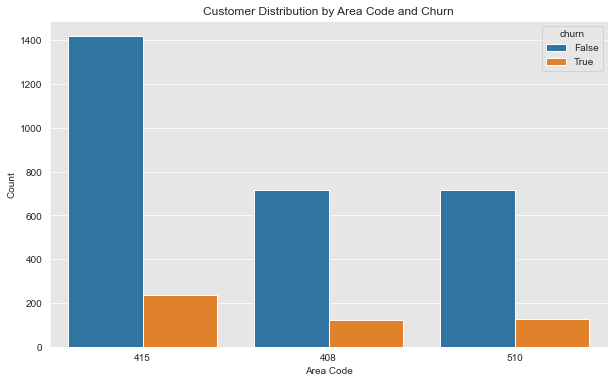

In [40]:
# Convert the 'area code' column to an object (string) column
customer_churn['area code'] = customer_churn['area code'].astype(str)
customer_churn['area code'].unique()
# To visualize the area codes
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_churn, x='area code', hue='churn')
plt.title('Customer Distribution by Area Code and Churn')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()

* The values the 'area code' column contains are essentially placeholders or labels, not numerical values that carry mathematical significance. To prevent potential interference with our predictive modeling process, we have undertaken the step of converting this column to a string data type. By doing so, we ensure that the 'area code' column is treated as a categorical variable with no numerical significance. This transformation aids in maintaining the integrity of our predictive model, especially when the model relies on numerical inputs, preventing any misinterpretation of the 'area code' as a quantitative feature
* The area code with the highest churn number is area code 415 followed by 510 and lastly 408

In [9]:
#To view the descriptive statistic of the dataset
customer_churn.describe()

account length  number vmail messages  total day minutes  \
count     3333.000000            3333.000000        3333.000000   
mean       101.064806               8.099010         179.775098   
std         39.822106              13.688365          54.467389   
min          1.000000               0.000000           0.000000   
25%         74.000000               0.000000         143.700000   
50%        101.000000               0.000000         179.400000   
75%        127.000000              20.000000         216.400000   
max        243.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

#### To check for missing values

In [10]:
#To check for missing values
customer_churn.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

* This is just another step where we confirm that the dataset has no missing values.

In [11]:
#To check for unique values in our dataset
customer_churn.nunique()


state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

* We view the unique values and classes in our dataset. We have 3 area codes, 2 international and voice mail plans. The phone number valuse can be used in this case as the unique identifier in our dataset

In [12]:
#To check for duplicated values
customer_churn.duplicated().sum()

0

* We have 0 duplicates in this dataset

#### Target variable class distribution

False    2850
True      483
Name: churn, dtype: int64


False    85.508551
True     14.491449
Name: churn, dtype: float64


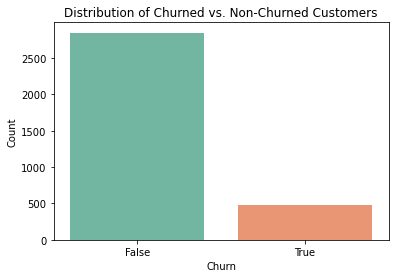

In [13]:
class_distribution = customer_churn['churn'].value_counts()
print(class_distribution)

print('\n')
#To view the % distribution      
class_distribution = customer_churn['churn'].value_counts(normalize=True) * 100
print(class_distribution)

#Visualization of the Churned Vs. Non-Churned Customers
sns.countplot(x='churn', data=customer_churn, palette='Set2')
plt.title('Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

* From the target variable above we see that the churn class value count is 483 whereas the no churn count is 2850. We note a significant class imbalance here where the churn is the minority class and not churn is the majority class. This is common in churn datasets.

* 85.5% customer did not churn while 14.5% customers churned. The imbalance means that a model trained without addressing this issue will be biased toward predicting the majority class (customers not churning). This will lead to high accuracy but poor performance in identifying actual churners.

* We will address class imbalance using a technique such as SMOTE before modeling to balance the 'churn' and 'not churn' classes. This should help improve overall model metrics like Precision, Recall, F1-score, and AUC-ROC. In imbalanced datasets, a model may achieve high accuracy by being biased toward the majority class, but this metric alone would be misleading and not truly reflective of the model's performance on the minority class which is what our model is meant to predict

#### Features of Customers Who Churn

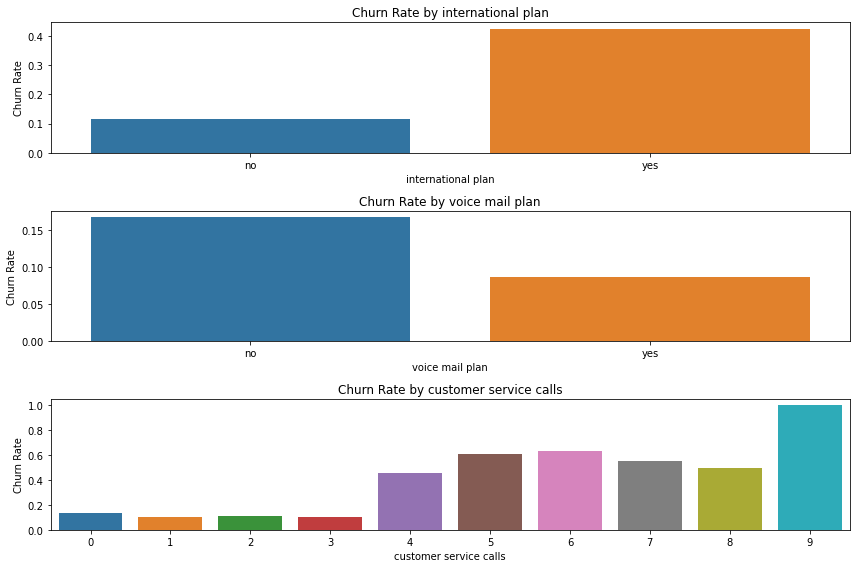

In [14]:
# List of features to check
y = customer_churn['churn']
features = ['international plan', 'voice mail plan', 'customer service calls']
# Dictionary to store churn rates for each feature
churn_rates = {}

# Calculate churn rates for each feature
for feature in features:
    churn_rates[feature] = pd.crosstab(customer_churn[feature], y, normalize='index')

# Plot churn rates for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    sns.barplot(x=churn_rates[feature].index, y=churn_rates[feature][1])
    plt.xlabel(feature)
    plt.ylabel('Churn Rate')
    plt.title(f'Churn Rate by {feature}')

plt.tight_layout()
plt.show()

* We observe from above that customers who churn have an international plan and do not have a voice mail plan. 

* Also the churn rate increases as the number of customer service calls increase. From above there is a gradual increase in churn rate at the point the customer makes the 4th call.

#### Feature Relationships

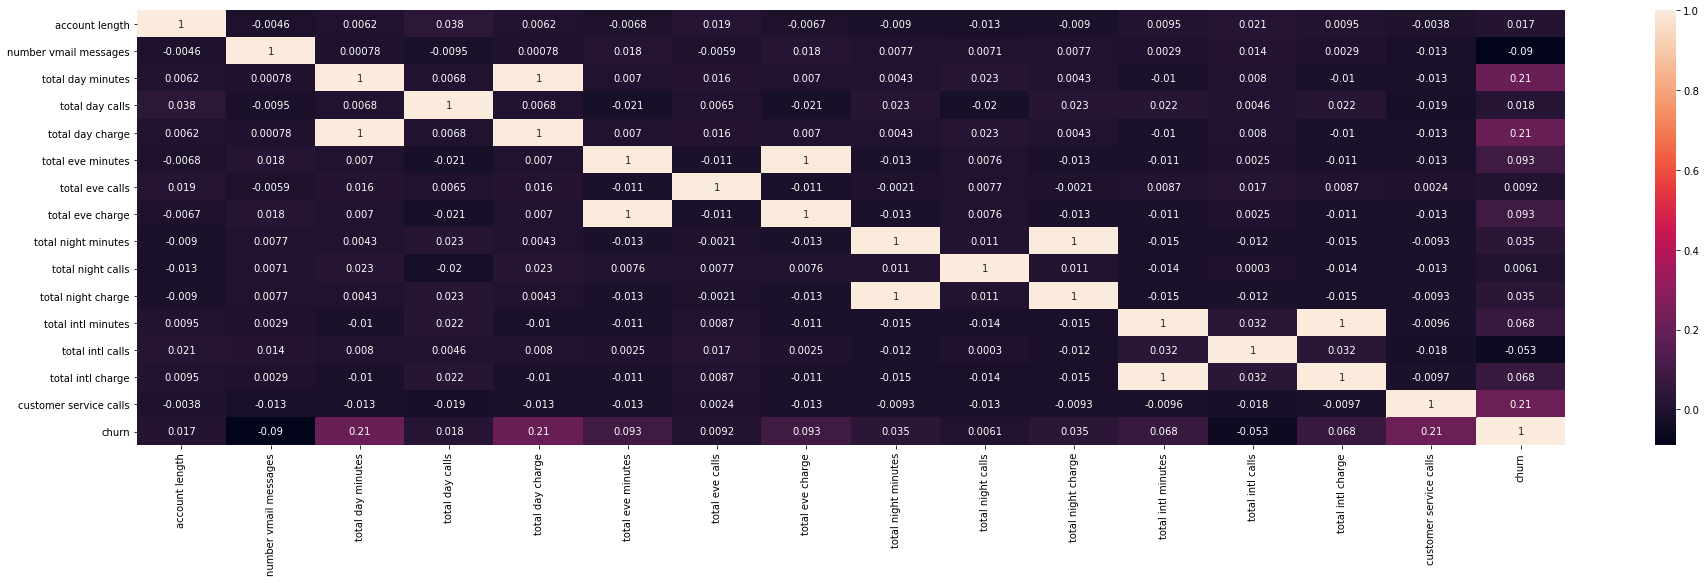

In [15]:
plt.rcParams['figure.figsize'] = (32, 8)  
sns.heatmap(customer_churn.corr(), annot=True)
plt.show()

* Our examination of the heatmap representation of the data revealed that several columns exhibit high levels of correlation with each other. For instance 'total day charge', 'total day minutes', 'total eve minutes', 'total eve charge', 'total night charge', 'total night minutes', 'total int minutes' and 'total int charge' have perfect multicollinearity. This is a condition where independent variables in our dataset are highly interrelated. Multicollinearity can make it challenging to discern the unique impact of each independent variable on the dependent variable in our modeling. This issue has the potential to create overfitting problems, particularly when employing Logistic Regression, as this method is sensitive to multicollinearity.

* To address this concern, it will be crucial to take specific steps to handle multicollinearity in our modeling process. These steps might involve employing techniques such as feature selection, dimensionality reduction, or regularization to mitigate the adverse effects of multicollinearity. By doing so, we can enhance the reliability and interpretability of our models and ensure that they provide accurate insights into the relationships between our independent and dependent variables.

#### Histogram to view the distribution of the numerical features

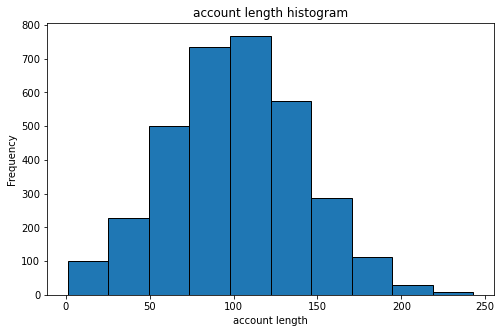

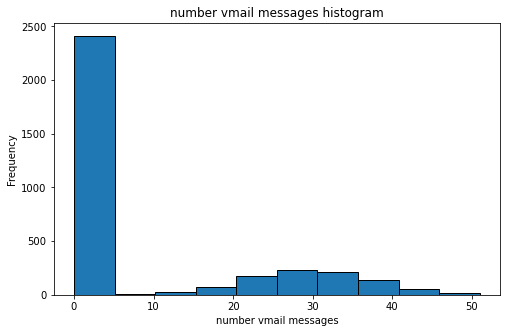

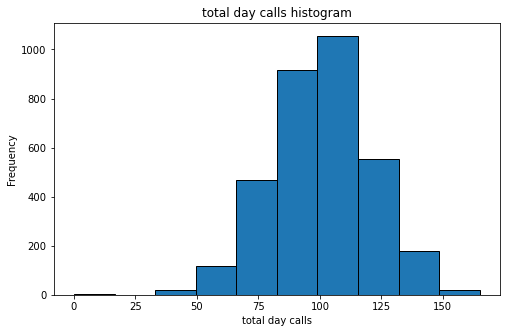

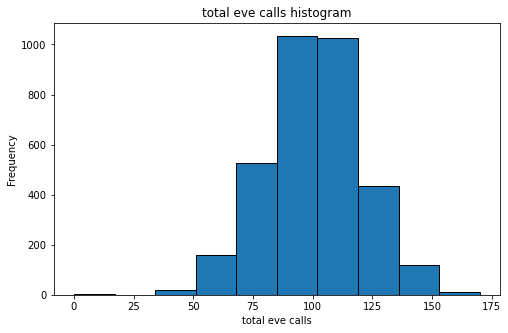

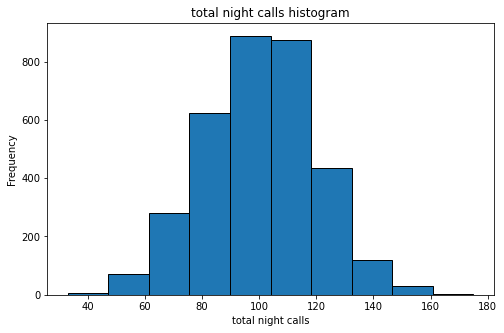

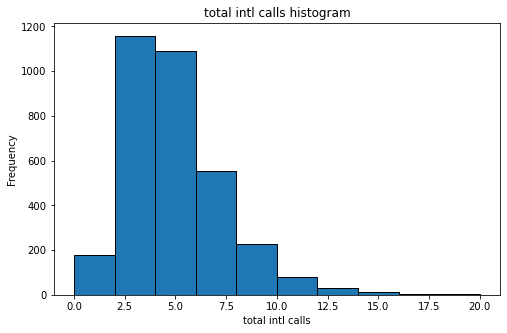

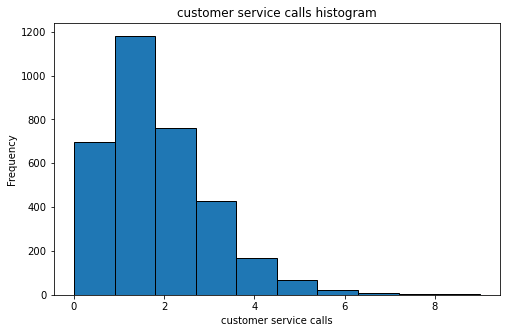

In [16]:
# Plot Histograms for numerical features to visualize their distribution
numerical_features = customer_churn.select_dtypes('int64', 'float64')
for feature in numerical_features:
    plt.figure(figsize=(8, 5))  # Set the figure size
    plt.hist(customer_churn[feature], bins=10, edgecolor='k', )  # Customize the number of bins
    plt.title(f'{feature} histogram')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

#### Outlier Visualization 

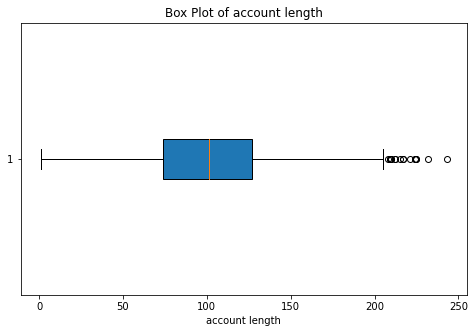

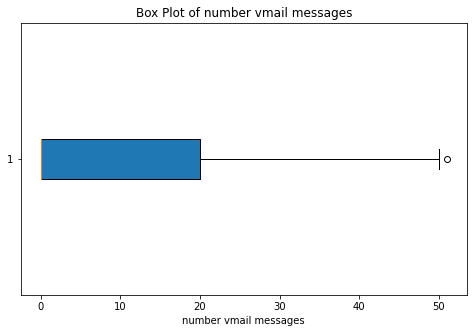

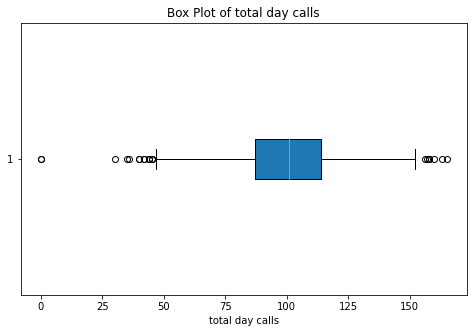

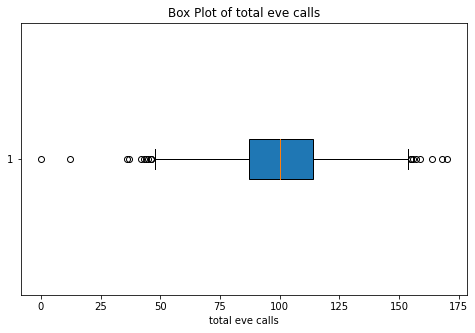

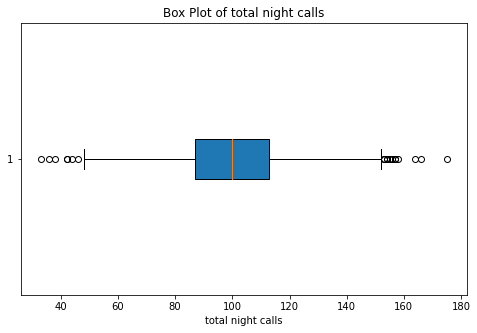

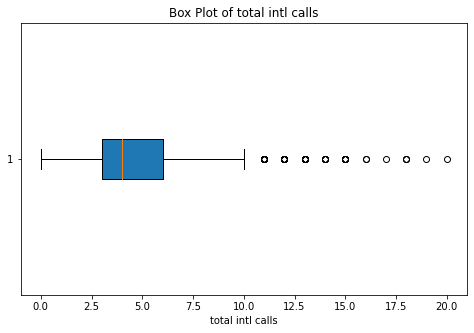

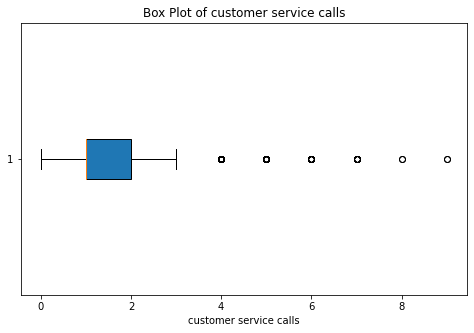

In [17]:
# Box plots to identify outliers and visualize the spread of data.
numerical_features = customer_churn.select_dtypes('int64', 'float64')
for feature in numerical_features:
    plt.figure(figsize=(8, 5))  # Set the figure size
    plt.boxplot(customer_churn[feature], vert=False, patch_artist=True)  # Create a horizontal box plot
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

* We observe the presence of a significant number of outliers in our dataset. Outliers have the potential to impact our modeling process. However, it is important to note that, in this case, these outliers are not anomalies that should be removed. Instead, they are a noteworthy aspect of our dataset that we should be aware of during our modeling process. These outliers may carry valuable information or insights that could be relevant to our analysis therefore it is essential to consider and account for them when developing our models and interpreting the results. Understanding the nature and impact of these outliers is a critical part of ensuring the robustness and accuracy of our data analysis.

* Adding regularization to our model can help reduce the impact of outliers by penalizing extreme parameter values, making the model more generalizable and robust



### 4. Data Preprocessing

####  Data Splitting 
We perform this step before preprocessing in order to prevent data leakage. This ensures that the test data remains completely unseen until the evaluation phase. Use the random state of 42 and a test size of 20%.

In [18]:
#Establish the X and y variables 
X = customer_churn.drop(['churn', 'state', 'area code', 'phone number'], axis=1) 
y = customer_churn['churn']
#Train test split using the random_state as 42 and test_size as 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


We have created the X and y variables. The y variable is the target variable. The X variable consists of all the features apart from the three indicated below: Why drop these columns:

* 'phone number' serves as a unique identifier for customers but is unlikely to be a predictive feature for churn.

* Including 'state' as a feature in a churn prediction model can introduce challenges. If treated as a categorical feature, it can lead to a high number of dummy variables (one-hot encoding) or require specific encoding strategies, potentially increasing the dimensionality of the dataset.

* 'area code' - This is less likely to have a direct impact on churn. It is typically an identifier and may not be a strong predictor.

#### Handling Missing Data
We do not have missing data therefore there isnt much to handle here in this preprocessing step.

#### Encoding Categorical Variables

In [19]:
#To check for the categorical variables
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 817 to 3174
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2666 non-null   int64  
 1   international plan      2666 non-null   object 
 2   voice mail plan         2666 non-null   object 
 3   number vmail messages   2666 non-null   int64  
 4   total day minutes       2666 non-null   float64
 5   total day calls         2666 non-null   int64  
 6   total day charge        2666 non-null   float64
 7   total eve minutes       2666 non-null   float64
 8   total eve calls         2666 non-null   int64  
 9   total eve charge        2666 non-null   float64
 10  total night minutes     2666 non-null   float64
 11  total night calls       2666 non-null   int64  
 12  total night charge      2666 non-null   float64
 13  total intl minutes      2666 non-null   float64
 14  total intl calls        2666 non-null 

* We have 2 features that are in the datatype object. We shall proceed to convert this variables to dummy ohe using the OneHotEncoder from sklearn.

In [20]:
#Select the objects dtypes
X_train_cat = X_train.select_dtypes(include=[object]).copy()

#Instatialize OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop=None) #Drop none since we have only 2 dummy variables
#To fit the categorical datatype
ohe.fit(X_train_cat)
# Transform the categorical columns
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_cat),
    index=X_train_cat.index,
    columns=ohe.get_feature_names_out(X_train_cat.columns)
)
# Select categorical columns from the test data
X_test_cat = X_test.select_dtypes(include=[object]).copy()

# Transform the test data using the already fitted encoder
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_cat),
    index=X_test_cat.index,
    columns=ohe.get_feature_names_out(X_test_cat.columns)
)
X_train_ohe.head()

international plan_no  international plan_yes  voice mail plan_no  \
817                     1.0                     0.0                 1.0   
1373                    1.0                     0.0                 1.0   
679                     0.0                     1.0                 1.0   
56                      1.0                     0.0                 1.0   
1993                    1.0                     0.0                 1.0   

      voice mail plan_yes  
817                   0.0  
1373                  0.0  
679                   0.0  
56                    0.0  
1993                  0.0

#### Data Normalization using MinMaxScaler 
MinMaxScaler with default parameters will create a maximum value of 1 and a minimum value of 0. This will work well with our binary one-hot encoded data.

In [21]:
#Selecte the numerical data from X_train
X_train_num = X_train.select_dtypes(exclude=[object]).copy()
#Initialize MinMaxScalerScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_num),
    # index is important to ensure we can concatenate with other columns
    index=X_train_num.index,
    columns=X_train_num.columns
)
#Selecte the numerical data from X_test data
X_test_num = X_test.select_dtypes(exclude=[object]).copy()
# Transform the test data using the already fitted Scaler
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_num),
    # index is important to ensure we can concatenate with other columns
    index=X_test_num.index,
    columns=X_test_num.columns
)
X_test_scaled.head()

account length  number vmail messages  total day minutes  \
438         0.462810                    0.0           0.437679   
2674        0.272727                    0.0           0.305859   
1345        0.400826                    0.0          -0.007467   
1957        0.603306                    0.0           0.603676   
2148        0.392562                    0.0           0.406088   

      total day calls  total day charge  total eve minutes  total eve calls  \
438          0.466667          0.437669           0.908991         0.623529   
2674         0.644444          0.305912           0.597745         0.729412   
1345        -0.222222         -0.007432           0.438823         0.764706   
1957         0.362963          0.603716           0.561177         0.535294   
2148         0.533333          0.406081           0.617817         0.429412   

      total eve charge  total night minutes  total night calls  \
438           0.909091             0.447015           0.633803   
2674          0.597865             0.444325           0.760563   
1345          0.439016             0.387036           0.387324   
1957          0.561307             0.357719           0.563380   
2148          0.617923             0.550027           0.408451   

      total night charge  total intl minutes  total intl calls  \
438             0.447101               0.675          0.157895   
2674            0.444710               0.640          0.315789   
1345            0.387328               0.340          0.052632   
1957            0.358039               0.510          0.105263   
2148            0.550508               0.500          0.368421   

      total intl charge  customer service calls  
438            0.675926                0.111111  
2674           0.640741                0.000000  
1345           0.340741                0.444444  
1957           0.509259                0.111111  
2148           0.500000                0.111111

#### Concatenating the Normalized and OheHotEncoded Train Data


In [22]:
# Concatenate the one-hot encoded categorical columns with the numerical columns
X_train_final = pd.concat([X_train_scaled, X_train_ohe], axis=1)

# Display the final DataFrame
X_train_final

account length  number vmail messages  total day minutes  \
817         1.000000               0.000000           0.266801   
1373        0.442149               0.000000           0.314187   
679         0.305785               0.000000           0.631246   
56          0.578512               0.000000           0.356979   
1993        0.351240               0.000000           0.613728   
...              ...                    ...                ...   
1095        0.433884               0.000000           0.780586   
1130        0.500000               0.000000           0.093337   
1294        0.268595               0.000000           0.244113   
860         0.694215               0.000000           0.507180   
3174        0.144628               0.843137           0.078403   

      total day calls  total day charge  total eve minutes  total eve calls  \
817          0.459259          0.266892           0.450096         0.370588   
1373         0.555556          0.314189           0.532582         0.647059   
679          0.355556          0.631250           0.899093         0.652941   
56           0.503704          0.356926           0.494913         0.364706   
1993         0.488889          0.613682           0.732197         0.452941   
...               ...               ...                ...              ...   
1095         0.666667          0.780574           0.546054         0.482353   
1130         0.237037          0.093412           0.497113         0.523529   
1294         0.340741          0.244088           0.720374         0.652941   
860          0.600000          0.507095           0.481716         0.764706   
3174         0.688889          0.078378           0.354963         0.688235   

      total eve charge  total night minutes  total night calls  \
817           0.450016             0.648198           0.598592   
1373          0.532514             0.499462           0.422535   
679           0.899385             0.497041           0.500000   
56            0.494985             0.316299           0.669014   
1993          0.732449             0.513179           0.542254   
...                ...                  ...                ...   
1095          0.546102             0.370091           0.204225   
1130          0.497250             0.614309           0.176056   
1294          0.720479             0.434104           0.647887   
860           0.481721             0.552448           0.415493   
3174          0.354901             0.814147           0.507042   

      total night charge  total intl minutes  total intl calls  \
817             0.648536               0.330          0.315789   
1373            0.499701               0.205          0.210526   
679             0.497310               0.435          0.473684   
56              0.316796               0.400          0.105263   
1993            0.513449               0.225          0.157895   
...                  ...                 ...               ...   
1095            0.370592               0.300          0.157895   
1130            0.614465               0.635          0.105263   
1294            0.434549               0.460          0.263158   
860             0.552899               0.495          0.315789   
3174            0.814704               0.430          0.315789   

      total intl charge  customer service calls  international plan_no  \
817            0.329630                0.222222                    1.0   
1373           0.205556                0.444444                    1.0   
679            0.435185                0.111111                    0.0   
56             0.400000                0.111111                    1.0   
1993           0.225926                0.000000                    1.0   
...                 ...                     ...                    ...   
1095           0.300000                0.111111                    1.0   
1130           0.635185                0.111111                    1.0   
1294        

#### Concatenating the Normalized and OheHotEncoded Test Data


In [23]:
# Concatenate the one-hot encoded categorical columns with the numerical columns
X_test_final = pd.concat([X_test_scaled, X_test_ohe], axis=1)

# Display the final DataFrame
X_test_final

account length  number vmail messages  total day minutes  \
438         0.462810               0.000000           0.437679   
2674        0.272727               0.000000           0.305859   
1345        0.400826               0.000000          -0.007467   
1957        0.603306               0.000000           0.603676   
2148        0.392562               0.000000           0.406088   
...              ...                    ...                ...   
2577        0.644628               0.000000           0.524124   
2763        0.475207               0.372549           0.439690   
3069        0.607438               0.509804           0.448306   
1468        0.305785               0.529412           0.329983   
582         0.425620               0.000000           0.464101   

      total day calls  total day charge  total eve minutes  total eve calls  \
438          0.466667          0.437669           0.908991         0.623529   
2674         0.644444          0.305912           0.597745         0.729412   
1345        -0.222222         -0.007432           0.438823         0.764706   
1957         0.362963          0.603716           0.561177         0.535294   
2148         0.533333          0.406081           0.617817         0.429412   
...               ...               ...                ...              ...   
2577         0.459259          0.524155           0.585648         0.500000   
2763         0.548148          0.439696           0.509761         0.694118   
3069         0.451852          0.448311           0.441298         0.747059   
1468         0.533333          0.330068           0.568600         0.747059   
582          0.585185          0.464020           0.427275         0.529412   

      total eve charge  total night minutes  total night calls  \
438           0.909091             0.447015           0.633803   
2674          0.597865             0.444325           0.760563   
1345          0.439016             0.387036           0.387324   
1957          0.561307             0.357719           0.563380   
2148          0.617923             0.550027           0.408451   
...                ...                  ...                ...   
2577          0.585895             0.465035           0.366197   
2763          0.509867             0.455890           0.584507   
3069          0.441281             0.524744           0.387324   
1468          0.568748             0.460463           0.570423   
582           0.427370             0.391877           0.591549   

      total night charge  total intl minutes  total intl calls  \
438             0.447101               0.675          0.157895   
2674            0.444710               0.640          0.315789   
1345            0.387328               0.340          0.052632   
1957            0.358039               0.510          0.105263   
2148            0.550508               0.500          0.368421   
...                  ...                 ...               ...   
2577            0.465033               0.425          0.263158   
2763            0.456067               0.410          0.105263   
3069            0.524806               0.495          0.157895   
1468            0.460849               0.210          0.368421   
582             0.392110               0.535          0.421053   

      total intl charge  customer service calls  international plan_no  \
438            0.675926                0.111111                    1.0   
2674           0.640741                0.000000                    1.0   
1345           0.340741                0.444444                    1.0   
1957           0.509259                0.111111                    1.0   
2148           0.500000                0.111111                    1.0   
...                 ...                     ...                    ...   
2577           0.425926                0.222222                    1.0   
2763           0.409259                0.333333                    1.0   
3069        

#### Feature Selection Using Domain Knowledge

* Our model will have the following selected features:

**Relevant Features**
* account length: Longer account length might indicate higher customer satisfaction and loyalty which would reduce the churn.
* international plan: Customers with an international plan may have different churn behaviors compared to those without it.
* voice mail plan: This feature can indicate how much customers are engaged with additional services. It can impact retention if customers value these features.
* number vmail messages: The number of voicemail messages can indicate the level of engagement with the service. Higher engagement may be associated with lower churn.
* total day minutes, total day calls, total day charge: Daytime usage patterns can provide insights into customer behavior and satisfaction. High usage might correlate with higher satisfaction.
* total eve minutes, total eve calls, total eve charge: Evening usage patterns can also be indicative of customer preferences.
* total night minutes, total night calls, total night charge: Nighttime usage may indicate different customer preferences or patterns.
* total intl minutes, total intl calls, total intl charge: International usage can reflect a customer's dependence on the telecom service for international communication, impacting churn.
* customer service calls: The number of calls to customer service is often a strong indicator of customer dissatisfaction or issues. Higher numbers of service calls can be associated with higher churn risk.

**Less Relevant Features**:
* state: This might not directly affect churn unless there are significant regional differences in service quality or customer behavior. It might be useful if combined with other features.
* area code: This might be less directly relevant unless there are specific patterns of churn related to geographic areas. However, it could potentially provide regional context if combined with other features.
* phone number: This is a unique identifier and does not contribute to the prediction of churn.

### 5. Model Selection
We will proceed with **Logistic Regression** since this is a classification problem with a binary target variable. However, we will account for the class imbalance observed earlier to ensure that the model performs well across both classes. The technique that we will use to account for the imbalance is SMOTE which will be discussed as we proceed.

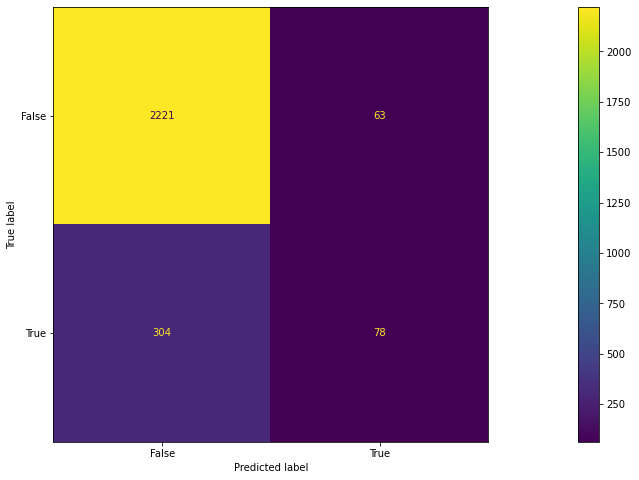

In [24]:
# Instantiate the model
baseline_model = LogisticRegression(fit_intercept=False, C=1e12, random_state=42, solver='liblinear')
# Fit the model on the scaled data
baseline_model.fit(X_train_final, y_train)
#To view the classifier Performance
ConfusionMatrixDisplay.from_estimator(estimator=baseline_model, X=X_train_final, y=y_train);

See interpretation from the confusion matrix generated before SMOTE

* True Positive: 78 Customers who would churn and predicted as positive

* False Negative: 304 Customers who would churn and predicted as negative

* False Positive: 63 Customers who would not churn and predicted as positive

* True Negative: 2221 Customers who would not churn and predicted as negative

#### Baseline Model Before Fixing Class Imbalance

In [25]:
#Predict the y_trained data from the X_trained final set
y_hat_train = baseline_model.predict(X_train_final)
#Calculate the classification metrics
model_accuracy = accuracy_score(y_train, y_hat_train) *100
model_recall = recall_score(y_train, y_hat_train) *100
model_precision = precision_score(y_train, y_hat_train) *100
model_f1 = f1_score(y_train, y_hat_train) *100
#print the metrics
print(f'Baseline Training Accuracy: {model_accuracy}')
print(f'Baseline Training Recall: {model_recall}')
print(f'Baseline Training Precision: {model_precision}')
print(f'Baseline Training F1_score: {model_f1}')

#Predict the y_trained data from the X_trained final set
y_hat_test = baseline_model.predict(X_test_final)
#Calculate the classification metrics
model_accuracy = accuracy_score(y_test, y_hat_test) *100
model_recall = recall_score(y_test, y_hat_test) *100
model_precision = precision_score(y_test, y_hat_test) *100
model_f1 = f1_score(y_test, y_hat_test) *100

print('\n')
#print the metrics
print(f'Baseline Testing Accuracy: {model_accuracy}')
print(f'Baseline Testing Recall: {model_recall}')
print(f'Baseline Testing Precision: {model_precision}')
print(f'Baseline Testing F1_score: {model_f1}')

# Let's calculate the probability scores of each of the datapoints:
y_score = baseline_model.fit(X_train_final, y_train).decision_function(X_test_final)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
# Calculate the AUC score
roc_auc_ = roc_auc_score(y_test, y_score)
#Print the ROC AUC Score
print(f"ROC AUC Score: {roc_auc_}")

Baseline Training Accuracy: 86.23405851462866
Baseline Training Recall: 20.418848167539267
Baseline Training Precision: 55.319148936170215
Baseline Training F1_score: 29.82791586998088


Baseline Testing Accuracy: 85.6071964017991
Baseline Testing Recall: 17.82178217821782
Baseline Testing Precision: 58.06451612903226
Baseline Testing F1_score: 27.27272727272727
ROC AUC Score: 0.8332750236154357


The baseline model struggles significantly with predicting customer churn, especially due to the class imbalance. Although it achieves high overall accuracy, this is largely due to correctly predicting non-churners, which doesn't align with the business goal of accurately identifying churners. The low recall and F1 scores indicate that the model is not effectively capturing the customers at risk of leaving, which is critical for implementing successful retention strategies. Improving the model’s performance on the minority class (churners) is essential for it to be truly valuable in a churn prediction context. We shall therefore proceed with balancing the minority class and see our models performance.

#### Handling Class Imbalance
The majority of the data (about 85.51%) falls into the 'False' or 0 category, while the minority of the data (about 14.49%) falls into the 'True' or 1 category. This indicates that the dataset is imbalanced, with a higher proportion of non-churned customers. To address this issue, we will use SMOTE (Synthetic Minority Over-sampling Technique). SMOTE increases the number of instances in the minority class by generating synthetic examples rather than simply duplicating existing ones, which helps balance the dataset and improve model performance.

In [26]:
#Instantialize the technique
smote = SMOTE()
X_train_resampled, y_train_resampled  = smote.fit_resample(X_train_final, y_train)
#print to view the distribution
print('Synthetic Sample Class Distribution:')
print(pd.Series(y_train_resampled).value_counts())

Synthetic Sample Class Distribution:
True     2284
False    2284
Name: churn, dtype: int64


* Now the churn and no churn class is balanced at 2284 each. We shall proceed to fit this balanced data on our model and view the classification metrics then compare with the baseline model.

#### Logistic Regression Iterative Model 2 
Here we shall use the balanced data with the following parameters random state=42, regularization: Lasso, C=1e6 and solver as liblinear

In [39]:
# Instantiate the model
iterative_model = LogisticRegression(
    penalty='l1',
    fit_intercept=False,
    C=1e6,
    random_state=42,
    solver='liblinear'
)# Fit the model on the resampled training data
iterative_model.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled training data
y_hat_train_model2 = iterative_model.predict(X_train_resampled)

# Calculate training metrics
model_accuracy_train = accuracy_score(y_train_resampled, y_hat_train_model2) * 100
model_recall_train = recall_score(y_train_resampled, y_hat_train_model2) * 100
model_precision_train = precision_score(y_train_resampled, y_hat_train_model2) * 100
model_f1_train = f1_score(y_train_resampled, y_hat_train_model2) * 100

# Print training metrics
print(f'Model_2 Training Accuracy: {model_accuracy_train}')
print(f'Model_2 Training Recall: {model_recall_train}')
print(f'Model_2 Training Precision: {model_precision_train}')
print(f'Model_2 Training F1_score: {model_f1_train}')

# Predict on the original test data
y_hat_test_model2 = iterative_model.predict(X_test_final)

# Calculate test metrics
model_accuracy_test = accuracy_score(y_test, y_hat_test_model2) * 100
model_recall_test = recall_score(y_test, y_hat_test_model2) * 100
model_precision_test = precision_score(y_test, y_hat_test_model2) * 100
model_f1_test = f1_score(y_test, y_hat_test_model2) * 100
print('\n')

# Print test metrics
print(f'Model_2 Test Accuracy: {model_accuracy_test}')
print(f'Model_2 Test Recall: {model_recall_test}')
print(f'Model_2 Test Precision: {model_precision_test}')
print(f'Model_2 Test F1_score: {model_f1_test}')

# Let's calculate the probability scores of each of the datapoints:
y_score = iterative_model.fit(X_train_resampled, y_train_resampled).decision_function(X_test_final)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_score)
print('\n')
#Print the ROC AUC Score
print(f"ROC AUC Score: {roc_auc}")

Model_2 Training Accuracy: 78.04290718038528
Model_2 Training Recall: 78.67775831873905
Model_2 Training Precision: 77.69130998702984
Model_2 Training F1_score: 78.1814226669567


Model_2 Test Accuracy: 79.01049475262369
Model_2 Test Recall: 77.22772277227723
Model_2 Test Precision: 40.0
Model_2 Test F1_score: 52.70270270270271


ROC AUC Score: 0.8348668789140398


Training Data Metrics Observations:

* Recall: Model 2’s recall is much higher (77.23% vs. 17.82% for the baseline). This is critical in churn prediction because identifying most of the customers at risk of churning allows the business to intervene effectively. Missing potential churners (low recall) can lead to a significant revenue loss.

* Precision: The baseline model has higher precision, meaning it’s more confident that those it predicts as churners will indeed churn. However, this comes at the cost of missing many actual churners (low recall). In this scenario, some false positives might be acceptable if it means catching more actual churners.

* F1 Score: Model 2 has a higher F1 score (52.70% vs. 27.27% for the baseline), indicating a better balance between catching true churners and avoiding unnecessary churn interventions. This balance is often more desirable in churn prediction, where both precision and recall matter.

* ROC AUC Score: Both models have similar ROC AUC scores, showing comparable abilities to rank customers by their churn risk. However, the slight edge in AUC for Model 2 reinforces its overall effectiveness.

Iterative Model 2 is likely the better choice for predicting customer churn. Its higher recall ensures that more potential churners are identified, which is crucial in churn prevention strategies. While it has a lower precision, the trade-off is justified by the significant gain in recall and F1 score, making Model 2 more reliable for targeting retention efforts and ultimately reducing customer attrition.

#### Visualizing ROC AUC

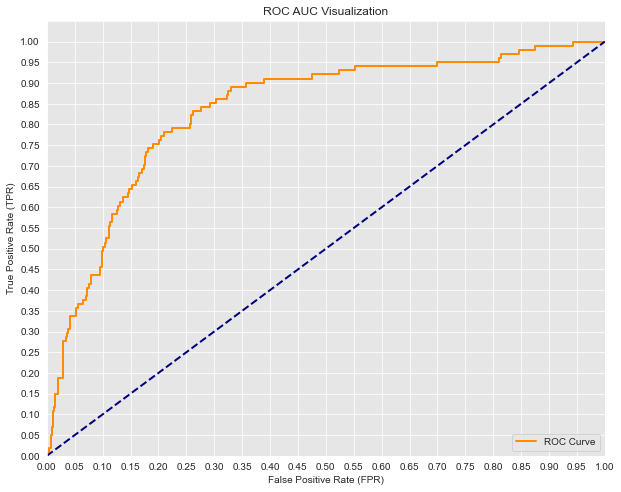

In [28]:
sns.set_style("darkgrid", {'axes.facecolor':'0.9'})
plt.figure(figsize=(10,8))
lw =2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC Curve')
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks([i/20.0 for i in range (21)])
plt.yticks([i/20.0 for i in range (21)])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC AUC Visualization')
plt.legend(loc="lower right")
plt.show()

#### Cross Validation Test
We shall evaluate the expected accuracy of our baseline and iterative model, prior to using the test data with `cv` of 5

In [29]:
#Cross Validation On Baseline Model
cv_scores_baseline = cross_val_score(baseline_model, X_train_final, y_train, cv=5)
print(f"Baseline cv score: {cv_scores_baseline.mean()}")
#Cross Validation On Iterative Model
print('\n')
cv_scores_iterative = cross_val_score(iterative_model, X_train_final, y_train, cv=5)
print(f"Iterative cv score: {cv_scores_iterative.mean()}")

Baseline cv score: 0.861215225808265


Iterative cv score: 0.861215225808265


* The Cross-Validation Mean Score of 86.12% is similar for both the baseline and iterative model.

* The iterative model appears to be performing better overall, especially in terms of generalization, as indicated by the cross-validation mean score of 86.12%. This score shows that our iterative model generalizes well across different subsets of data.

#### Decision Trees
Other than Logistic Regression, we shall try another model using Decision Trees. Decision trees are a powerful and flexible tool for classification problems, offering ease of interpretation, handling non-linear relationships, and providing automatic feature selection.

In [30]:
#Train Test Split using the random state as 42 and test size as 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

from sklearn.compose import ColumnTransformer

# Identify categorical features
categorical_features = ['international plan', 'voice mail plan']

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Keep other features as they are
)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
#Instantiate and fit the model
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train_processed, y_train)
# Make predictions on the train and test data
y_pred = clf.predict(X_test_processed)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("ROC_AUC:", roc_auc)
print("Classification Report:")
print(report)

Accuracy: 0.904047976011994
ROC_AUC: 0.8255169156491621
Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.94      0.94       566
        True       0.67      0.71      0.69       101

    accuracy                           0.90       667
   macro avg       0.81      0.83      0.82       667
weighted avg       0.91      0.90      0.91       667



* Accuracy: The model achieves an accuracy of approximately 90.40%, indicating that it correctly predicts the class labels for the majority of instances in the test data.

* Classification Report: The classification report provides a more detailed evaluation of the model's performance:

* For the no churn class (the majority class), the model shows a precision, recall, and F1-score of around 0.94. This indicates that it makes accurate positive predictions for this class, and it correctly identifies the majority of actual "0" cases.

* For the churn class (the minority class), the precision, recall, and F1-score are lower at approximately 0.69. While the precision is not as high, it still correctly identifies a substantial portion of actual "1" cases.

* The macro and weighted averages of precision, recall, and F1-score provide an overall assessment of the model's performance, giving more weight to the majority class (weighted average).

The model appears to be providing reasonably good results, especially for the majority class, which is typical for imbalanced datasets.

#### Hyperparameter Tuning and Pruning - Decision Tree
For The Maximum depth of the Tree

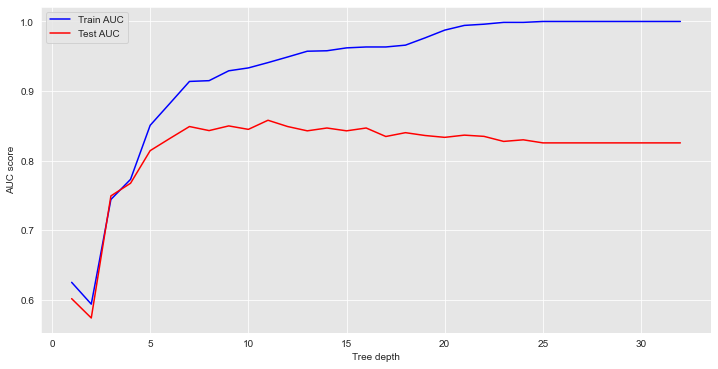

In [31]:
# Identify the optimal tree depth for the data
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    clf.fit(X_train_processed, y_train)
    train_pred = clf.predict(X_train_processed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = clf.predict(X_test_processed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
#Plot the AUC curves
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

* Training error increases with increasing tree depth
* Test error increases after depth 2.5 then gradually decreases after depth of 11
* Training and test errors rise rapidly between the depths of 2.5 and 3
* Optimal value seen here is 2.5

##### Finding the Min_samples split

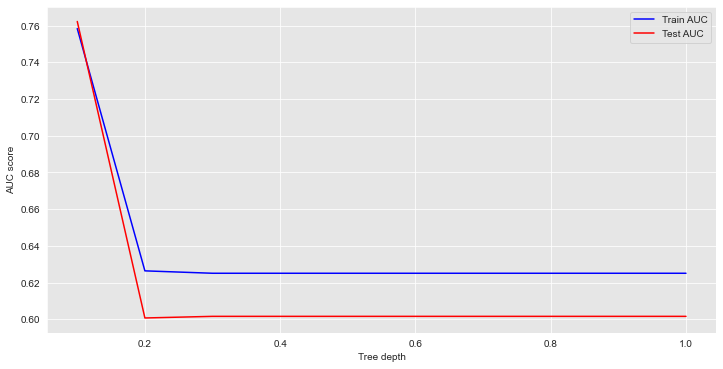

In [32]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=42)
    clf.fit(X_train_processed, y_train)
    train_pred = clf.predict(X_train_processed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = clf.predict(X_test_processed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
#Plot the AUC curves 
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

* AUC for both test and train data stabilizes at 0.2 
* Further increase in minimum sample split does not improve learning 

##### Finding The Min Samples Leaf

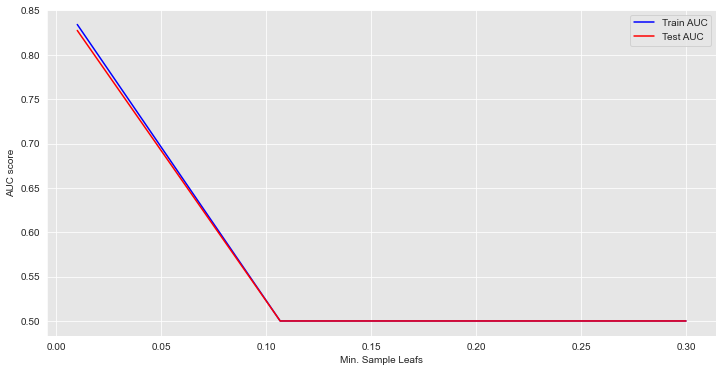

In [33]:
min_samples_leafs = np.linspace(0.01, 0.3, 4, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=42)
    clf.fit(X_train_processed, y_train)
    train_pred = clf.predict(X_train_processed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = clf.predict(X_test_processed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

* The accuracy drops down at 0.11 for both test and training as we continue to increase the parameter value 
* AUC gives best value at 0.01 for both test and training sets 

##### Finding the Maximum Features

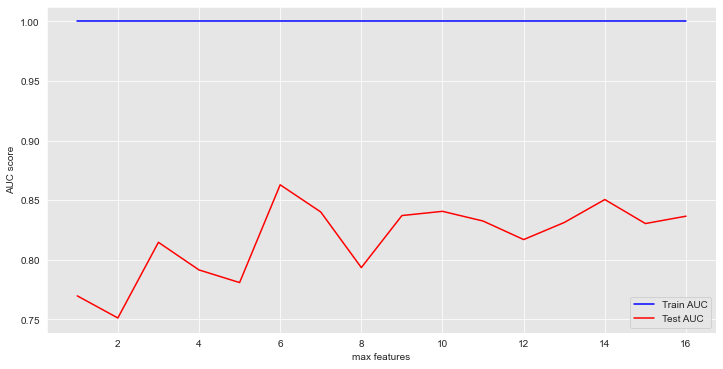

In [34]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    clf = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=42)
    clf.fit(X_train_processed, y_train)
    train_pred = clf.predict(X_train_processed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = clf.predict(X_test_processed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

* No clear effect on the training dataset - flat AUC 
* Some fluctuations in test AUC but not definitive enough to make a judgement
* Highest AUC value seen at 6

#### Training the Classifier With the Identified Feature Points

In [35]:
# Train a classifier with optimal values identified above
clf = DecisionTreeClassifier(criterion='entropy',
                           max_features=6,
                           max_depth=3,
                           min_samples_split=0.2,
                           min_samples_leaf=0.11, 
                           random_state=42)
clf.fit(X_train_processed, y_train)
y_pred = clf.predict(X_test_processed)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

* We actually have a worse AUC than the vanilla classifier, because we tuned the hyper parameters one at a time. 
* With more complicated (and bigger) datasets, we might see an improvement in AUC/accuracy of the classifier. 

#### Iterative Model With Grid Search
In order to address the issue of a baseline classifier performing better than a tuned one like this let us look at a  more-sophisticated technique called grid search.

In [36]:
from sklearn.model_selection import GridSearchCV
# Define the model
model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           scoring='accuracy',  # Scoring metric
                           n_jobs=-1,  # Use all available cores
                           verbose=1)  # Verbose output
# Fit grid search to the data
grid_search.fit(X_train_processed, y_train)
# Best parameters and best model
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
# Predict on the test data
y_pred = best_model.predict(X_test_processed)

# Print classification report and accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.9369830863390742
Test Accuracy: 0.9310344827586207
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.97      0.96       566
        True       0.81      0.71      0.76       101

    accuracy                           0.93       667
   macro avg       0.88      0.84      0.86       667
weighted avg       0.93      0.93      0.93       667



Our model from the grid search performs better than our baseline Decision Tree model. See reasons why:

*  Higher Accuracy
Accuracy: The test accuracy of 93.1% is higher than the baseline accuracy of 90.4%. Higher accuracy indicates that the model is correctly classifying a greater proportion of the test data.

* F1-Score: The F1-scores for both classes (True and False) in the grid search results are higher than those in the baseline metrics. The F1-score is a better metric than accuracy in cases of class imbalance, as it considers both precision and recall.

* Improved Precision and Recall
Precision and Recall: In the grid search results, the precision for the 'True' class is 81% and recall is 71%, leading to a higher F1-score of 76%. This shows that the model is better at correctly identifying positive cases (churn) compared to the baseline where the precision and recall are lower.

* Macro Average: The macro average F1-score in the grid search results (0.86) is higher compared to the baseline (0.82). This indicates a more balanced performance across both classes.

* Better ROC AUC Score
ROC AUC Score: The ROC AUC score of 0.937 from the grid search indicates a better model performance in distinguishing between churn and no churn as it measures the ability of the model to correctly classify positives and negatives. The baseline ROC AUC score of 0.826 is lower, suggesting that the grid search model has improved performance in this aspect.

* Model Tuning Benefits
Hyperparameter Tuning: The grid search results reflect the benefits of hyperparameter tuning. The best score and improved metrics indicate that the model has been optimized for better performance compared to the baseline model. 

#### Visualize the Decision Tree with the Grid Search Best Parameters

In [37]:
#Iterate through X_train_processed using the for loop
feature_names = [f'feature_{i}' for i in range(X_train_processed.shape[1])]

# Instantiate and fit the DecisionTreeClassifier using the Grid search best parameters
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=4, min_samples_split=10, random_state=42)
model.fit(X_train_processed, y_train)

# Plot and show the decision tree with adjusted size
plt.figure(figsize=(30, 30), dpi=400)  # Set figure size and DPI
tree.plot_tree(model, 
               feature_names=feature_names,
               class_names=np.unique(y_train).astype('str'),
               filled=True, rounded=True,
               fontsize=13)  # Set font size
plt.show()

#### Model of Choice
From the above models we have seen that the best performing model is the **Decision Tree Tuned by Grid Search technique**.
The model has high accuracy and strong performance metrics for both churn and non-churn classes. The high recall for non-churn (False) indicates that the model effectively identifies customers who are likely to stay. The precision for churn (True) shows the model's effectiveness in identifying actual churners among the predicted churn cases. This balanced performance makes it a robust model for business applications where both accurate churn and non-churn predictions are crucial. The logistic regression iterative model has higher recall, making it better at catching more churners, but the much lower precision means it also predicts churn for many who won't actually churn, potentially wasting resources.

In our case where the cost of missing a churner is significant but precision also matters for resource allocation, the decision tree model is the better choice. It is therefore likely more suitable for making business decisions related to customer retention and marketing strategies.

#### Probable Limitations In Production
While our model might show high precision and recall for churners on the validation set, it could miss many churners or falsely classify non-churners in the real-world scenario, reducing its effectiveness in retaining customers. This would be due to overfitting.

Our recall for churners is low, the model might not effectively identify all potential churners, impacting the ability to proactively address churn and retain customers.

The model may not accurately predict churners if customer behavior has evolved since the model was last trained, potentially reducing its relevance and accuracy in the current context.

#### Mitigation Strategies
Regular Monitoring and Updating: Continuously monitor the model’s performance in production. Implement regular updates and retraining to account for shifts in customer behavior and data distribution.

Validation on Real-World Data: Validate the model on recent, real-world data before full-scale deployment. This helps ensure the model performs well under current conditions.

Combine with Other Models: Consider using ensemble methods or combining predictions from multiple models to improve overall prediction accuracy and robustness.

#### Conclusions
What is the churn current % rate: The churn rate is at 14.5% from the data shared. We noted an imbalance on the churn target variable.

What features/attributes do the customers who churn have. The customers who churn do not have voice mail plans, have international plans and the risk of churn increases at the point the client makes more than 3 calls.

What strategies can SyriaTel implement to increase customer retention: See recommendations provided below

#### Recommendations
Customer Service Calls Investigation: Dig deeper to understand why some customers need to contact customer service frequently. This will help in finding ways to better assist them.

International Plan Churn Investigation: Since some of the customers with international plans are leaving, it's essential to explore ways to retain these customers.

High Churn States Analysis:Look into the states where many customers are leaving to identify any patterns or reasons for the high churn rates.